In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import importlib
import scipy

#Get some functions from external file
current_dir = os.getcwd()
os.chdir(r"C:\Users\sjefs\Desktop\AMAS\Functions")     # Direct to external module
import AMAS_functions as AMAS
importlib.reload(AMAS)
os.chdir(current_dir)

# Material
Handbook for statistical distributions at:
https://inspirehep.net/files/1ab434101d8a444500856db124098f9c. 

# Exercise 1
We want to find $p(N|k)$.  In this case, we need to use the hypergeometric probability as the likelihood:
$\begin{equation}
p(k|N) = \frac{\binom{K}{k} \binom{N-K}{n-k} }{\binom{N}{n}}
\end{equation}$

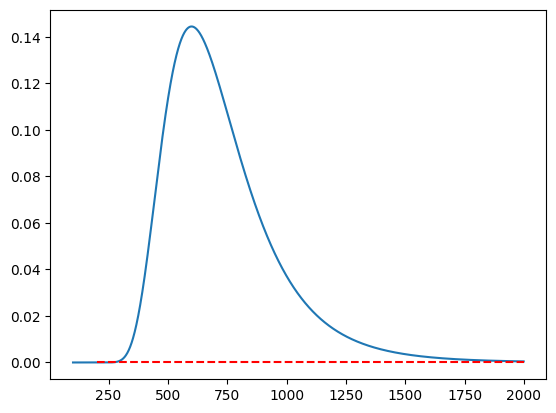

In [109]:
#define bonimal and hypergeometric probability mass function
def binom(a, b):
    return scipy.special.binom(a, b)
def pmf(N, k=10, K=100, n=60):
    return binom(K, k) * binom(N - K, n - k) / binom(N, n)

# Test for a range of N's
N_test = np.arange(1, 2000, 1)
pmf_test = pmf(N_test, k = 10)
plt.plot(N_test, pmf_test)
plt.hlines(0.0, 200, 2000, colors='r', linestyles='dashed')

# Exercise 2
Say the likelihood we used before, was the one with prior = 1. 

Now with$post = like \; * prior$, we will see what happens to the likelihood when we use different priors:
$\begin{equation}
p_{prior} = C
\end{equation}$
$\begin{equation}
p_{prior} = C/N
\end{equation}$

Thus we can get the likelihood as $post/prior$. 


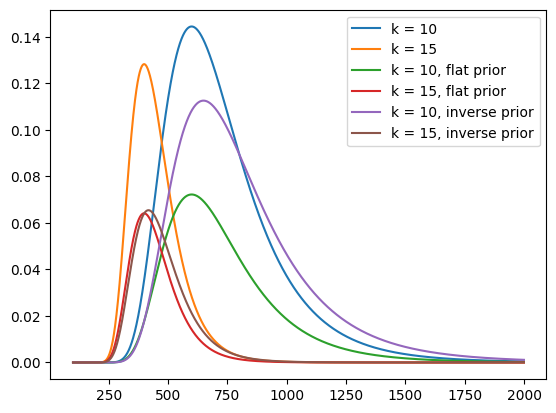

In [110]:
post_k_10 = pmf(N_test, k = 10)
post_k_15 = pmf(N_test, k = 15)

def prior_flat(C = 2):
    return C
def prior_inv(N, C = 800):
    return C/N

likelihood_flat_k_10 = pmf(N_test, k = 10)/prior_flat()
likelihood_flat_k_15 = pmf(N_test, k = 15)/prior_flat()
likelihood_inv_k_10 = pmf(N_test, k = 10)/prior_inv(N_test)
likelihood_inv_k_15 = pmf(N_test, k = 15)/prior_inv(N_test)

plt.plot(N_test, post_k_10, label = 'k = 10')
plt.plot(N_test, post_k_15, label = 'k = 15')
plt.plot(N_test, likelihood_flat_k_10, label = 'k = 10, flat prior')
plt.plot(N_test, likelihood_flat_k_15, label = 'k = 15, flat prior')
plt.plot(N_test, likelihood_inv_k_10, label = 'k = 10, inverse prior')
plt.plot(N_test, likelihood_inv_k_15, label = 'k = 15, inverse prior')
plt.legend()


We note that using a flat prior does not change the location of the maximum likelihood N. But using a non flat prior shifts the maximum likelihood N. 

# Exercise Fish
We do a quick calculation: with $V_{pref} = 10m^3$ pr fish and $V_{tot} = 5000m^3$ lake, theres roughly $N_{hyp} = 500$ fish. Now we can propogate the errors:
$\begin{equation}
\Delta N_{hyp} = \left[ (\frac{1}{V_{tot}} \Delta V_{pref})^2 + (\frac{V_pref}{V_{tot}^2} \Delta V_{tot})^2 \right]^{1/2}
\end{equation}$
and use this as out $\sigma$ in the gaussian prior: $f_{gauss} = f_{gauss} (mu = N_{hyp}, sigma = \Delta N_{hyp})$

500.0 58.309518948453004


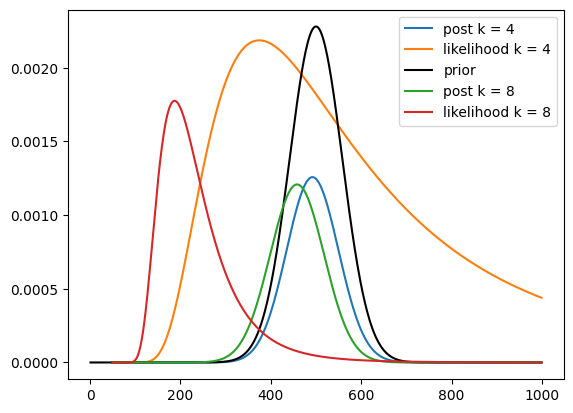

In [117]:
V_pref = 10
V_pref_err = 1
V_tot = 5000
V_tot_err = 300
N_hyp = V_tot/V_pref
N_hyp_err = np.sqrt((V_tot_err/V_pref)**2 + (V_tot*V_pref_err/V_pref**2)**2)
print(N_hyp, N_hyp_err)

def prior_gauss(N, mu = N_hyp, sigma = N_hyp_err):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(N-mu)**2/(2*sigma**2))

def post_gauss(N, k = 4, K=50, n = 30):
    return pmf(N, k = k, K = K, n = n)*prior_gauss(N)

N_test = np.arange(1, 1000, 1)
plt.figure()
plt.plot(N_test, post_gauss(N_test, k = 4), label = "post k = 4")
plt.plot(N_test, pmf(N_test, k = 4, K = 50, n = 30)/100, label = "likelihood k = 4")
plt.plot(N_test, prior_gauss(N_test)/3, color = "black", label = "prior")
plt.legend()

plt.plot(N_test, post_gauss(N_test, k = 8)*30, label = "post k = 8")
plt.plot(N_test, pmf(N_test, k = 8, K = 50, n = 30)/100, label = "likelihood k = 8")
plt.legend()